# Assignment 1

In [2]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Fetch data
file_path = '.\AmesHousing.csv'
housing = pd.read_csv(file_path)

## Data exploration

In [5]:
# Show data
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
# Display data info (82 attributes)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
# Closer look at the 'House Style' attribute
housing['House Style'].value_counts()

House Style
1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

In [8]:
# Summary of numerical attributes
housing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


array([[<Axes: title={'center': 'Order'}>,
        <Axes: title={'center': 'PID'}>,
        <Axes: title={'center': 'MS SubClass'}>,
        <Axes: title={'center': 'Lot Frontage'}>,
        <Axes: title={'center': 'Lot Area'}>,
        <Axes: title={'center': 'Overall Qual'}>],
       [<Axes: title={'center': 'Overall Cond'}>,
        <Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Year Remod/Add'}>,
        <Axes: title={'center': 'Mas Vnr Area'}>,
        <Axes: title={'center': 'BsmtFin SF 1'}>,
        <Axes: title={'center': 'BsmtFin SF 2'}>],
       [<Axes: title={'center': 'Bsmt Unf SF'}>,
        <Axes: title={'center': 'Total Bsmt SF'}>,
        <Axes: title={'center': '1st Flr SF'}>,
        <Axes: title={'center': '2nd Flr SF'}>,
        <Axes: title={'center': 'Low Qual Fin SF'}>,
        <Axes: title={'center': 'Gr Liv Area'}>],
       [<Axes: title={'center': 'Bsmt Full Bath'}>,
        <Axes: title={'center': 'Bsmt Half Bath'}>,
        <Axes: t

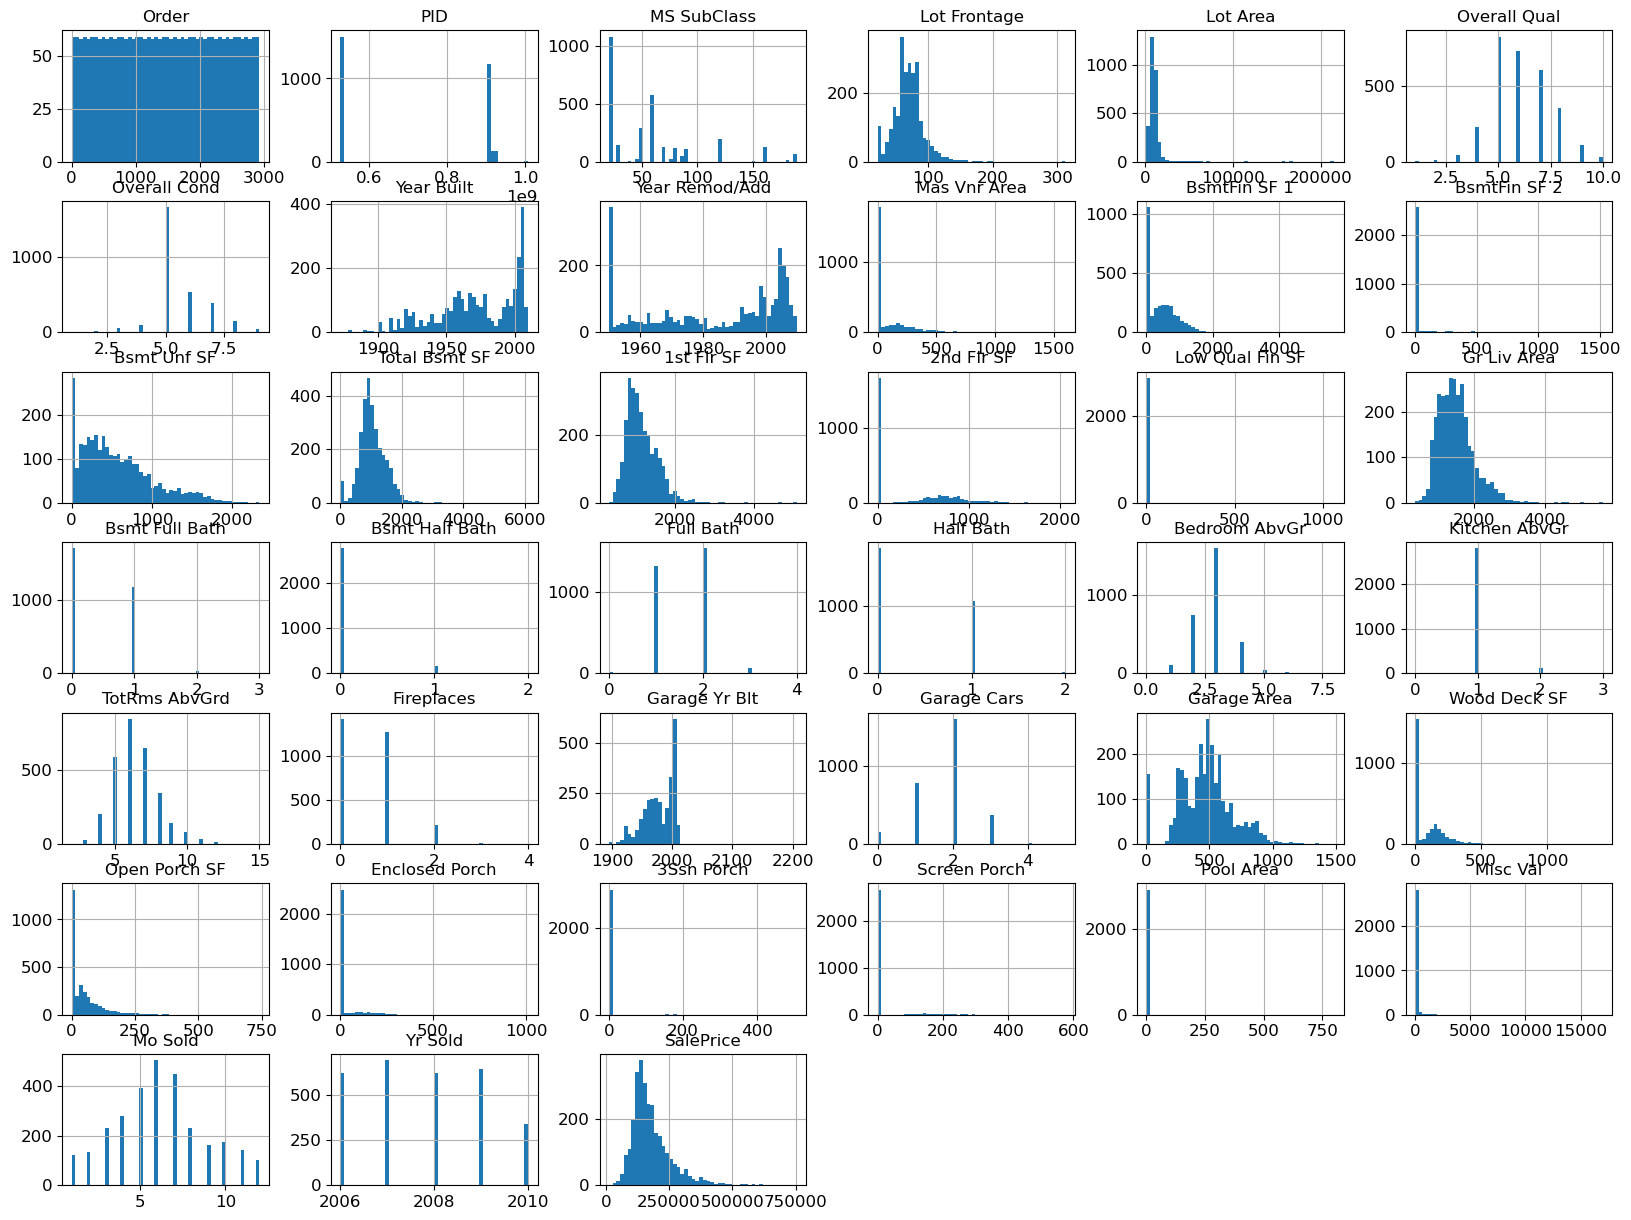

In [9]:
# Histograms of numerical values
%matplotlib inline
housing.hist(bins = 50, figsize = (20, 15))

<Axes: >

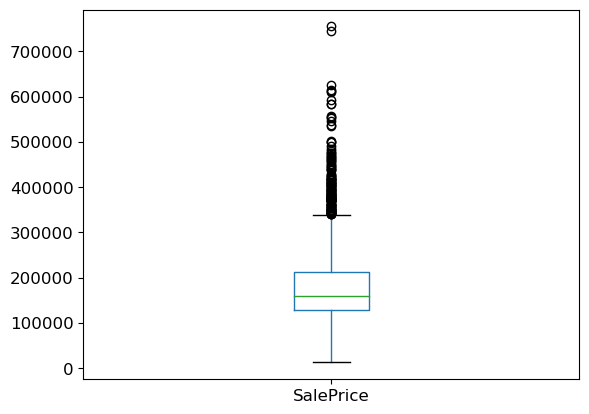

In [10]:
# Make box plot for SalePrice
housing.boxplot(column = ['SalePrice'], grid = False)

In [11]:
# Look for correlations with SalePrice attribute
correlations = housing.describe().corr()
correlations['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Lot Area           0.961890
Misc Val           0.901266
Gr Liv Area        0.840582
Total Bsmt SF      0.835920
1st Flr SF         0.793761
BsmtFin SF 1       0.772743
PID                0.729731
Order              0.530879
Bsmt Unf SF        0.389123
2nd Flr SF         0.311234
Mas Vnr Area       0.186123
Garage Yr Blt      0.161319
BsmtFin SF 2       0.157685
Garage Area        0.144147
Wood Deck SF       0.133266
Year Built         0.057057
Year Remod/Add     0.046227
Yr Sold            0.037674
Low Qual Fin SF    0.023101
Enclosed Porch     0.005227
Pool Area         -0.061659
Open Porch SF     -0.083545
Screen Porch      -0.137095
3Ssn Porch        -0.157052
Lot Frontage      -0.210654
MS SubClass       -0.268010
TotRms AbvGrd     -0.314440
Mo Sold           -0.315287
Overall Qual      -0.315847
Bedroom AbvGr     -0.315963
Overall Cond      -0.316084
Garage Cars       -0.316772
Fireplaces        -0.316958
Full Bath         -0.317060
Bsmt Full Bath    -0

<Axes: xlabel='Lot Area', ylabel='SalePrice'>

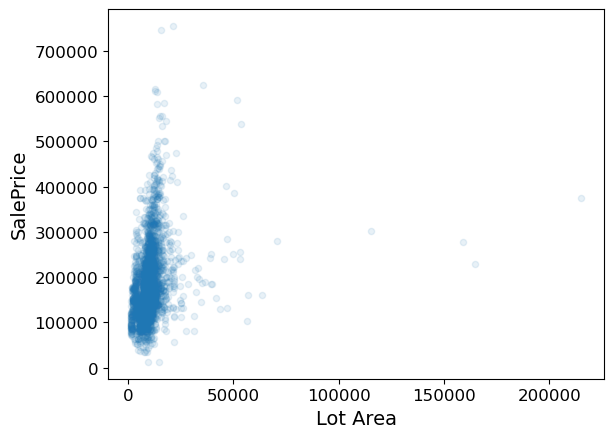

In [12]:
# Make scatter plot with highest correclating attribute
housing.plot(kind = 'scatter', x = 'Lot Area', y = 'SalePrice', alpha = 0.1)

## Data preprocessing

In [14]:
# Create train/test splits
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(len(train_set), 'Train Instances +', len(test_set), 'Test Instances')

2344 Train Instances + 586 Test Instances


In [15]:
# Separate train data
housing = train_set.drop('SalePrice', axis = 1)
housing_labels = train_set['SalePrice'].copy()

In [16]:
# Remove identifier features
unique_columns = []

for u_column in housing.columns:
    if len(housing[u_column].unique()) == len(train_set):
        unique_columns.append(u_column)

housing = housing.drop(columns=unique_columns)

In [17]:
# Checking for missing values
missing_housing = housing.isnull().sum()
missing_housing[missing_housing > 0].sort_values(ascending=False)

Pool QC           2332
Misc Feature      2250
Alley             2182
Fence             1874
Mas Vnr Type      1426
Fireplace Qu      1144
Lot Frontage       393
Garage Yr Blt      122
Garage Cond        122
Garage Qual        122
Garage Finish      122
Garage Type        120
Bsmt Exposure       63
BsmtFin Type 2      62
Bsmt Qual           61
BsmtFin Type 1      61
Bsmt Cond           61
Mas Vnr Area        19
BsmtFin SF 1         1
Bsmt Half Bath       1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Bsmt Full Bath       1
dtype: int64

In [18]:
# Remove features with a missing value count above a specified threshold
# Here we set the threshold to 1000 because of the big interval between the missing value count of the 'Fireplace Qu' and 'Lot Frontage' attributes
# and we do not believe the attributes who have missing values conuts above the threshold are of much significance
threshold = 1000

m_columns = missing_housing[missing_housing > threshold].keys()
housing = housing.drop(columns=m_columns)

In [19]:
# Check for more missing values
missing_housing = housing.isnull().sum()
missing_housing[missing_housing > 0].sort_values(ascending=False)

Lot Frontage      393
Garage Yr Blt     122
Garage Qual       122
Garage Finish     122
Garage Cond       122
Garage Type       120
Bsmt Exposure      63
BsmtFin Type 2     62
BsmtFin Type 1     61
Bsmt Cond          61
Bsmt Qual          61
Mas Vnr Area       19
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Cars         1
Garage Area         1
Total Bsmt SF       1
dtype: int64

In [20]:
# Check for once more missing values
missing_housing = housing.isnull().sum()
missing_housing[missing_housing > 0].sort_values(ascending=False)

Lot Frontage      393
Garage Yr Blt     122
Garage Qual       122
Garage Finish     122
Garage Cond       122
Garage Type       120
Bsmt Exposure      63
BsmtFin Type 2     62
BsmtFin Type 1     61
Bsmt Cond          61
Bsmt Qual          61
Mas Vnr Area       19
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Cars         1
Garage Area         1
Total Bsmt SF       1
dtype: int64

In [21]:
# Define imputer fitted to the dataset with only numerical attributes
imputer = SimpleImputer(strategy = 'median')

# Make copy of dataset without categorical attributes
columns = housing.columns
num_columns = housing.describe().columns
non_num_columns = []

i = 0
while i < len(columns):
    column = columns[i]
    if column not in num_columns:
        non_num_columns.append(column)
    i += 1

housing_num = housing.drop(columns=non_num_columns, axis = 1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [22]:
# Convert imputer array into pandas dataframe
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = list(housing.index.values))

In [23]:
# Fill missing values with data from dataframe
sample_incomplete_rows = housing[housing.isnull().any(axis = 1)].head()
housing_tr.loc[sample_incomplete_rows.index.values]

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
834,60.0,68.0,28698.0,5.0,5.0,1967.0,1967.0,0.0,249.0,764.0,...,538.0,486.0,0.0,0.0,0.0,225.0,0.0,0.0,6.0,2009.0
1898,90.0,70.0,9842.0,4.0,5.0,1962.0,1962.0,0.0,0.0,0.0,...,462.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2007.0
678,90.0,60.0,7200.0,4.0,5.0,1949.0,1950.0,0.0,0.0,0.0,...,420.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0
700,190.0,63.0,7627.0,4.0,6.0,1920.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,148.0,0.0,0.0,0.0,0.0,10.0,2009.0
1915,60.0,68.0,18450.0,6.0,5.0,1965.0,1979.0,113.0,187.0,723.0,...,596.0,0.0,265.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0


In [24]:
# Fill completed attributes in original training set
for attrib in housing_tr.columns:
    housing[attrib] = housing_tr[attrib]

In [25]:
missing_housing = housing.isnull().sum()
missing_housing[missing_housing > 0].sort_values(ascending=False)

Garage Finish     122
Garage Qual       122
Garage Cond       122
Garage Type       120
Bsmt Exposure      63
BsmtFin Type 2     62
Bsmt Qual          61
Bsmt Cond          61
BsmtFin Type 1     61
dtype: int64

### Categorical attributes

In [27]:
# Fill missing categorical values
# Here we fill each missing value with the category with the highest count

num_columns = housing.describe().columns
m_columns = missing_housing[missing_housing > 0].keys()
m_cat_columns = []

for column in m_columns:
    if column not in num_columns:
        m_cat_columns.append(column)

max_cats = []

for column in m_cat_columns:
    max_cats.append(housing[column].value_counts().keys()[0])

i = 0
while i < len(m_cat_columns):
    housing[m_cat_columns[i]] = housing[m_cat_columns[i]].fillna(max_cats[i])
    i += 1

In [28]:
missing_housing = housing.isnull().sum()
missing_housing[missing_housing > 0].sort_values(ascending=False)

Series([], dtype: int64)

Now, since our housing training set contains no more missing values, we can continue with converting categorical values into numerical.

In [30]:
# Code gathered from https://gist.github.com/machinelearning-blog/76b50b18c7db3408646cc8d18c50c20b at 2024.09.25

# copied from PR #9151.
# Just run this cell or copy it to your code. You don't need to understand it right now.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype= int)
        X_mask = np.ones_like(X, dtype=bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [31]:
cat_encoder = CategoricalEncoder()
housing_cat = housing.drop(columns=housing.describe().columns, axis = 1)

housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<86728x173 sparse matrix of type '<class 'numpy.float64'>'
	with 86728 stored elements in Compressed Sparse Row format>

In [32]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
cat_encoder.categories_

[array(['1.5Fin', '1.5Unf', '1Fam', '1Story', '2.5Fin', '2.5Unf', '2Story',
        '2Types', '2fmCon', 'A (agr)', 'ALQ', 'Abnorml', 'AdjLand',
        'AllPub', 'Alloca', 'Artery', 'AsbShng', 'AsphShn', 'Attchd', 'Av',
        'BLQ', 'Basment', 'Blmngtn', 'Blueste', 'Bnk', 'BrDale', 'Brk Cmn',
        'BrkComm', 'BrkFace', 'BrkSide', 'BrkTil', 'BuiltIn', 'C (all)',
        'CBlock', 'COD', 'CWD', 'CarPort', 'CemntBd', 'ClearCr', 'ClyTile',
        'CmentBd', 'CollgCr', 'CompShg', 'Con', 'ConLD', 'ConLI', 'ConLw',
        'Corner', 'Crawfor', 'CulDSac', 'Detchd', 'Duplex', 'Edwards',
        'Ex', 'FR2', 'FR3', 'FV', 'Fa', 'Family', 'Feedr', 'Fin', 'Flat',
        'Floor', 'FuseA', 'FuseF', 'FuseP', 'GLQ', 'Gable', 'Gambrel',
        'GasA', 'GasW', 'Gd', 'Gilbert', 'Grav', 'Greens', 'GrnHill',
        'Grvl', 'Gtl', 'HLS', 'HdBoard', 'Hip', 'I (all)', 'IDOTRR', 'IR1',
        'IR2', 'IR3', 'ImStucc', 'Inside', 'Landmrk', 'Low', 'Lvl', 'LwQ',
        'Maj1', 'Maj2', 'Mansard', 'MeadowV

### Feature scaling

In [35]:
# Code gathered form https://gist.github.com/machinelearning-blog/76b50b18c7db3408646cc8d18c50c20b at 2024.09.25

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [36]:
num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding='onehot-dense')),
])

In [37]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [38]:
full_poly_pipeline = Pipeline([
    ('full_pipeline', full_pipeline),
    ('poly_features', PolynomialFeatures(degree = 2))
])

In [39]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.87181667,  0.51464178,  0.03380992, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.06290638, -0.04704703,  2.30708197, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76394867,  0.04656777, -0.03551382, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.06290638, -0.23427663, -0.16608596, ...,  0.        ,
         1.        ,  0.        ],
       [-0.17077438,  0.56144919, -0.35032808, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.64710829, -0.42150624, -0.36374558, ...,  0.        ,
         1.        ,  0.        ]])

In [40]:
housing_prepared_poly = full_poly_pipeline.fit_transform(housing)
housing_prepared_poly

array([[ 1.        , -0.87181667,  0.51464178, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.06290638, -0.04704703, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.76394867,  0.04656777, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.06290638, -0.23427663, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , -0.17077438,  0.56144919, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.64710829, -0.42150624, ...,  1.        ,
         0.        ,  0.        ]])

## Train Models

In [42]:
# LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [43]:
some_housing = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_housing_prepared = full_pipeline.transform(some_housing)

print('Predictions:', lin_reg.predict(some_housing_prepared))

Predictions: [146410. 189661.  86569.  88735. 118081.]


In [44]:
print('Labels:', list(some_labels))

Labels: [152000, 185000, 101800, 90000, 94550]


In [45]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

20955.162382042392

Most values are between 100,000 and 200,000 dollars so this prediction error is not great.

In [47]:
# LinearRegression using PolynomialFeatures
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(housing_prepared_poly, housing_labels)

LinearRegression()

In [48]:
some_housing = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_housing_prepared = full_poly_pipeline.transform(some_housing)

print('Predictions:', lin_reg_poly.predict(some_housing_prepared))

Predictions: [152000.         185000.         101800.          90000.
  94549.99999999]


In [49]:
print('Labels:', list(some_labels))

Labels: [152000, 185000, 101800, 90000, 94550]


In [50]:
housing_predictions = lin_reg_poly.predict(housing_prepared_poly)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.857776588672386e-09

This prediction error is unbelievably good, suggesting the model is strongly overfitting. Let us use **K-Fold Cross-Validation** to test our model once more.

In [52]:
scores = cross_val_score(lin_reg_poly, housing_prepared_poly, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
rmse_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

display_scores(rmse_scores)

Scores: [ 40037.09788814 128404.70141589  37184.79060946  42096.95658696
  36381.88857898  35216.91234583  78177.41009533  32028.75395052
  56231.33988129  52428.6769692 ]
Mean: 53818.8528321604
Standard deviation: 28094.591600581538


Now we see that our model really is much worse than our first linear regression.

In [55]:
# RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [56]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

10122.598678081837

This predection error is a big improvement from the first linear regression, and is our best resonable result thus far.